In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating dummy data that is linearly dependent
however contains some noise, so that it would be impossible to build idea line through the data

In [2]:
N = 40

X = np.random.random(N) * 10 - 5

W = 1.5
b = -3

Y = W * X + b + np.random.randn(N)

#### Plotting the data
to check if it is really dependent
And in fact, it is.

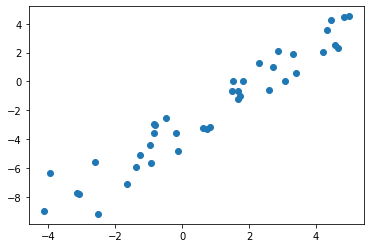

In [3]:
fig, axis = plt.subplots()

axis.scatter(X, Y)

#### Setting up model

Converting data to tensors

In [4]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

input_tens = torch.from_numpy(X.astype(np.float32))
target = torch.from_numpy(Y.astype(np.float32))

Setting up actual linear model

In [5]:
model = nn.Linear(1, 1)

Setting up loss function criterion and type of optimizer

In [6]:
criterion = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)

#### Fitting data to the model
This is an iterative process of leaning

In [7]:
# we would save our loss function values so we could understand model performance better
losses = []

# we will run 300 iterations
for epoch in range(300):
    
    # put gradient values to zero since they accumulate while backpropogation is computed 
    opt.zero_grad()
    
    # result of forward propagation
    output = model(input_tens)
    
    # calculate the loss function and add it to the list
    loss = criterion(output, target)
    losses.append(loss.item())
    
    # backpropogation step. Here partial derivatives and their effect of the model parameters is calculated
    loss.backward()
    opt.step()
    
    # print progress of the training
    if (epoch % 30 == 0):
        print('{}/299 epoch is running, loss function value: {}'.format(epoch, loss))

0/29 epoch is running, loss function value: 19.096446990966797
5/29 epoch is running, loss function value: 14.198994636535645
10/29 epoch is running, loss function value: 11.687081336975098
15/29 epoch is running, loss function value: 9.889097213745117
20/29 epoch is running, loss function value: 8.442659378051758
25/29 epoch is running, loss function value: 7.243273735046387
30/29 epoch is running, loss function value: 6.241610050201416
35/29 epoch is running, loss function value: 5.403690814971924
40/29 epoch is running, loss function value: 4.702483177185059
45/29 epoch is running, loss function value: 4.115631580352783
50/29 epoch is running, loss function value: 3.6244759559631348
55/29 epoch is running, loss function value: 3.213409423828125
60/29 epoch is running, loss function value: 2.869372844696045
65/29 epoch is running, loss function value: 2.5814356803894043
70/29 epoch is running, loss function value: 2.340449810028076
75/29 epoch is running, loss function value: 2.13876

#### Evaluate Performance of the Model
Loss graph shows that training went pretty well

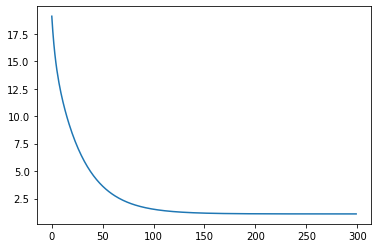

In [8]:
plt.plot(losses)

Plot acquired line on the data

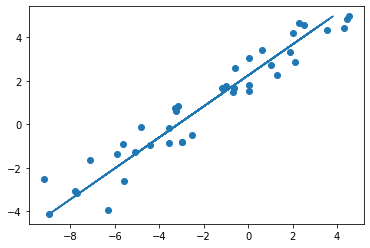

In [13]:
plt.scatter(Y, X)
plt.plot(model(input_tens).detach().numpy(), X)

Compare acquired parameters with true ones

In [11]:
model_weight = model.weight.detach().numpy()
model_bias = model.bias.detach().numpy()

print('Parameters: {}, {}'.format(model.weight.detach().numpy(), model.bias.detach().numpy()))
print('Actual Parameters: {}, {}'.format(W, b))

Parameters: [[1.4028119]], [-3.1486125]
Actual Parameters: 1.5, -3
